In [1]:
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns
import dataframe_image as dfi

In [2]:
df = pd.read_csv('Nifty50_processed_data.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [3]:
df1=df.head()
df2 = df1.style.set_table_attributes("style='display:inline'").set_caption('Nifty50')
df2

,Open,High,Low,Close,Adj Close,Volume,PCR,pcr_sa,SMA20,EMA20,Return,Volatile,ATRr_14,RSI,MACD,MSig,MHist
Date,,,,,,,,,,,,,,,,,
2022-02-12 00:00:00,18752.400000,18781.950000,18639.200000,18696.100000,18696.100000,254400,0.940000,1,18377.760000,18489.100000,0.000000,0.030000,209.470000,66.460000,-60.790000,-87.040000,26.240000
2022-01-12 00:00:00,18871.950000,18887.600000,18778.200000,18812.500000,18812.500000,325000,1.270000,0,18408.830000,18523.730000,0.010000,0.030000,207.840000,70.140000,-8.010000,-56.010000,48.000000
2022-11-30 00:00:00,18625.700000,18816.050000,18616.550000,18758.350000,18758.350000,345600,1.550000,0,18440.620000,18548.560000,0.000000,0.030000,207.100000,66.490000,22.140000,-39.860000,62.010000
2022-11-29 00:00:00,18552.450000,18678.100000,18552.150000,18618.050000,18618.050000,195300,1.280000,0,18464.910000,18555.840000,-0.010000,0.030000,207.020000,58.050000,45.840000,-26.130000,71.970000
2022-11-28 00:00:00,18430.550000,18614.250000,18365.600000,18562.750000,18562.750000,206500,1.280000,0,18492.320000,18556.550000,0.000000,0.030000,210.930000,55.080000,64.660000,-13.850000,78.510000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


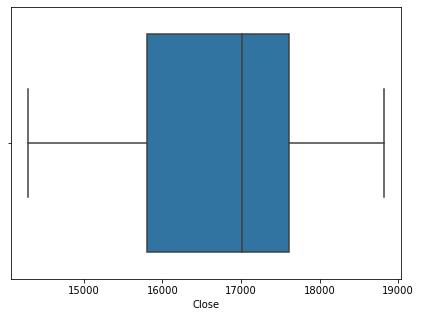

In [4]:
import seaborn as sb

plt.subplots(figsize=(7,5))
sb.boxplot(df['Close'])
plt.show()

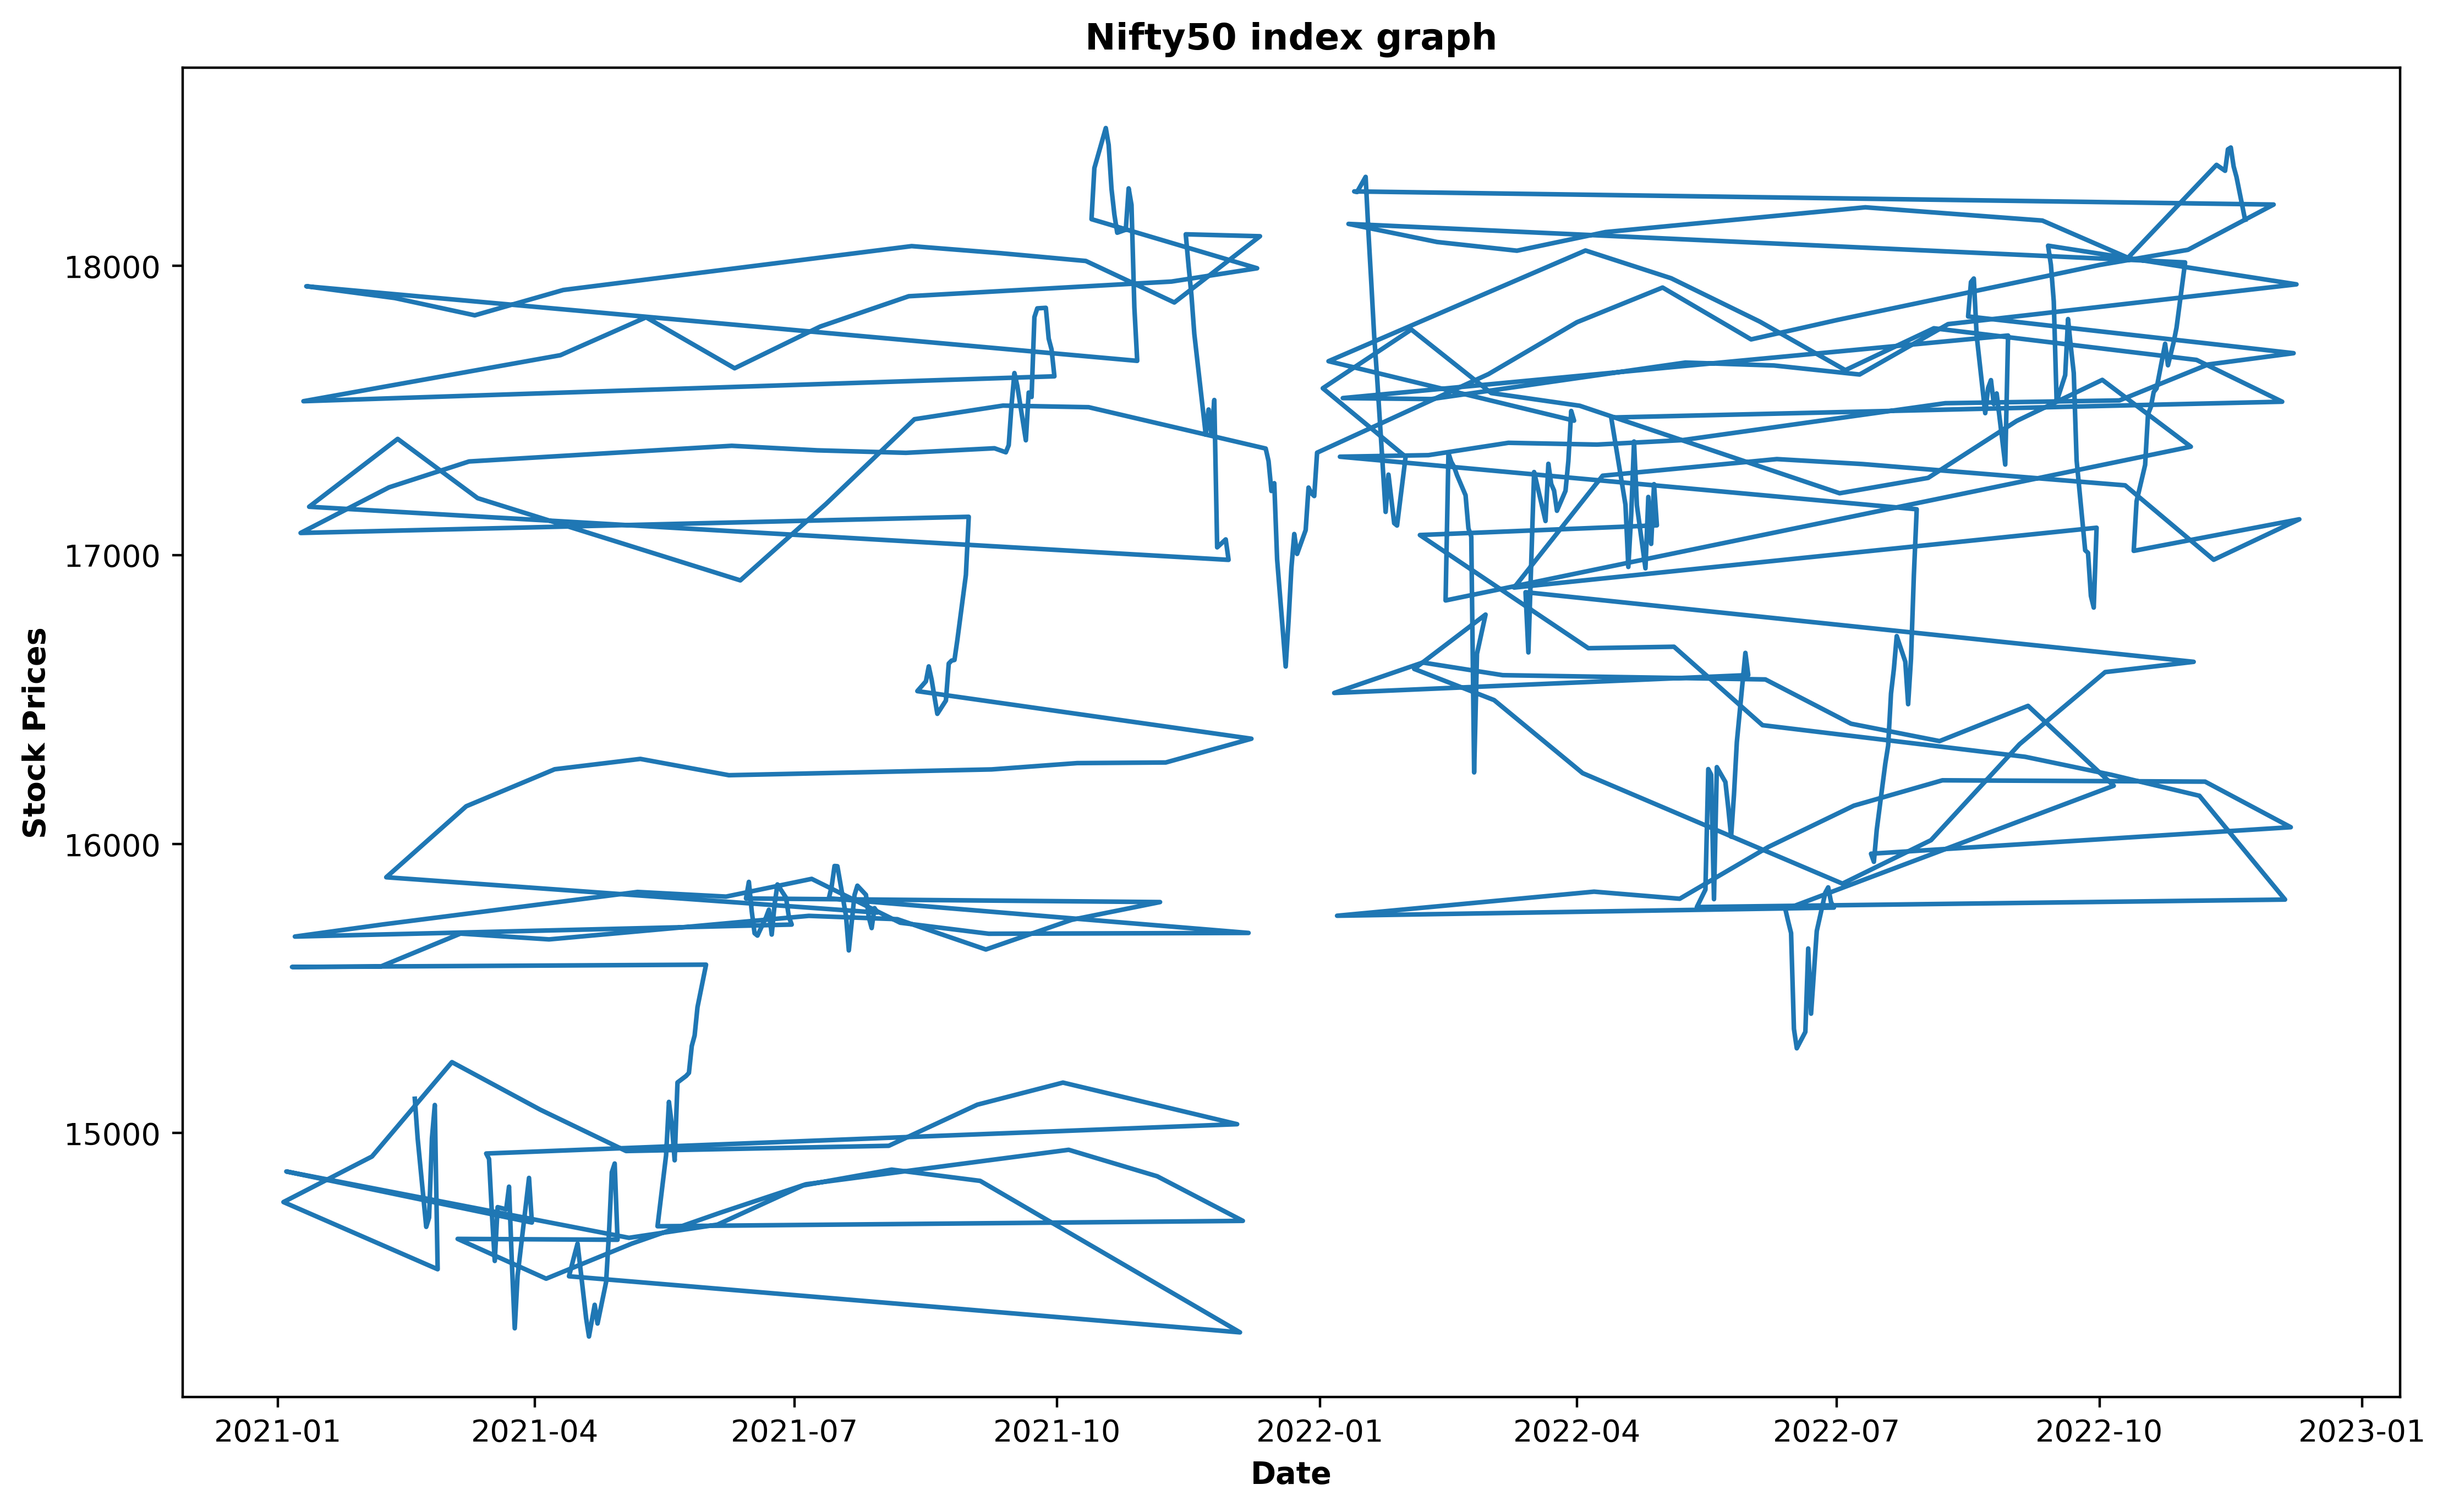

In [26]:
df_close=df['Close'] 
# Drop rows with missing values 
df_close= df_close.dropna() 
# Plot the closing price of GLD 
#df_close.Close.plot(figsize=(15,10))
plt.figure(figsize=(13, 8), dpi= 400)
plt.plot(df['Close'])
plt.title("Nifty50 index graph", weight='bold')
plt.xlabel("Date", weight='bold')
plt.ylabel("Stock Prices", weight = 'bold')
plt.show()

In [6]:
df['S_3'] = df['Close'].shift(1).rolling(window=3).mean() 
df['S_9']= df['Close'].shift(1).rolling(window=9).mean() 
df= df.dropna() 
X = df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2022-11-21,18331.850000,18550.672222
2022-11-18,18223.800000,18491.100000
2022-11-17,18237.266667,18435.005556
2022-11-16,18270.500000,18388.955556
2022-11-15,18353.733333,18365.800000


In [7]:
y = df['Close']
y.head()

Date
2022-11-21    18159.95
2022-11-18    18307.65
2022-11-17    18343.90
2022-11-16    18409.65
2022-11-15    18403.40
Name: Close, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(347, 2)
(347,)
(87, 2)
(87,)


In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)

from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor().fit(X_train,y_train)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train,y_train)

from sklearn.linear_model import LinearRegression 
lr = LinearRegression().fit(X_train,y_train)

from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor().fit(X_train,y_train)

from sklearn import linear_model
poisson = linear_model.PoissonRegressor().fit(X_train,y_train)

from sklearn.linear_model import ElasticNet
#from sklearn.datasets import make_regression
elastic = ElasticNet().fit(X_train,y_train)

from sklearn.linear_model import ARDRegression, BayesianRidge
bayes = BayesianRidge().fit(X_train,y_train)

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr = SVR(kernel = 'linear').fit(X_train,y_train)

from sklearn.linear_model import SGDRegressor
sgd = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)).fit(X_train,y_train)

from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(X_train,y_train)

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train,y_train)

#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from sklearn.preprocessing import MinMaxScaler 

#from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
#hwes = HWES(X_train, seasonal_periods=12, trend='add', seasonal='mul').fit(X_train,y_train)

#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
#arima = ARIMA(train_data, order=(1,1,2)).fit(X_train,y_train)

In [10]:
y_pred_ridge = ridge.predict(X_test)
y_pred_dt = dt.predict(X_test) 
y_pred_rf = rf.predict(X_test) 
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_gbr = gbr.predict(X_test) 
y_pred_poisson = poisson.predict(X_test) 
y_pred_elastic = elastic.predict(X_test)  
y_pred_bayes = bayes.predict(X_test) 
y_pred_svr = svr.predict(X_test) 
y_pred_sgd = sgd.predict(X_test) 
y_pred_lars = lars.predict(X_test) 
y_pred_mlp = mlp.predict(X_test) 

In [11]:
y_pred_ridge = pd.DataFrame(y_pred_ridge,index=y_test.index,columns = ['Ridge Regression']) 
y_pred_dt = pd.DataFrame(y_pred_dt,index=y_test.index,columns = ['Decision Tree Regression']) 
y_pred_rf = pd.DataFrame(y_pred_rf,index=y_test.index,columns = ['Random Forest Regression']) 
y_pred_lr = pd.DataFrame(y_pred_lr,index=y_test.index,columns = ['Linear Regression']) 
y_pred_lasso = pd.DataFrame(y_pred_lasso,index=y_test.index,columns = ['Lasso Regression']) 
y_pred_gbr = pd.DataFrame(y_pred_gbr,index=y_test.index,columns = ['Gradient Boosting Regression']) 
y_pred_poisson = pd.DataFrame(y_pred_poisson,index=y_test.index,columns = ['Poisson Regression']) 
y_pred_elastic = pd.DataFrame(y_pred_elastic,index=y_test.index,columns = ['Elastic Net Regression']) 
y_pred_bayes = pd.DataFrame(y_pred_bayes,index=y_test.index,columns = ['Bayes Regression']) 
y_pred_svr = pd.DataFrame(y_pred_svr,index=y_test.index,columns = ['Support Vector Regression']) 
y_pred_sgd = pd.DataFrame(y_pred_sgd,index=y_test.index,columns = ['Stochastic Gradient Descent Regression']) 
y_pred_lars = pd.DataFrame(y_pred_lars,index=y_test.index,columns = ['Least Angle Regression']) 
y_pred_mlp = pd.DataFrame(y_pred_mlp,index=y_test.index,columns = ['Multilayer Perceptron Regression']) 

Text(0.5, 1.0, 'Nifty50 price prediction using regression methods (2021-2022)')

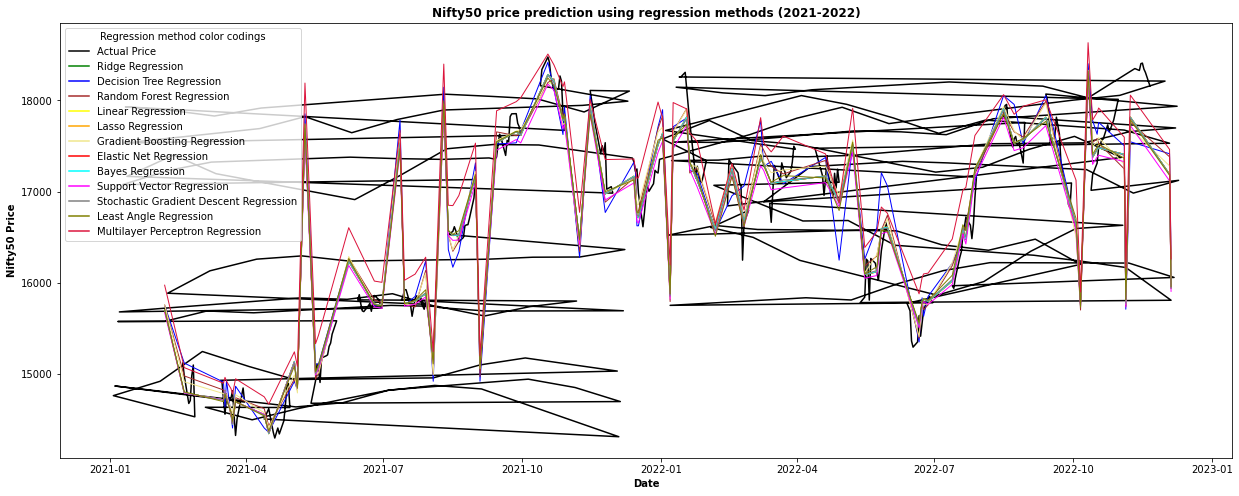

In [12]:
plt.figure(figsize=(21, 8))
sns.color_palette()
plt.plot(df['Close'], color = 'black', label = 'Actual Price')
sns.lineplot(data=y_pred_ridge, palette=['green'], linewidth=1)
sns.lineplot(data=y_pred_dt, palette=['blue'], linewidth=1)
sns.lineplot(data=y_pred_rf, palette=['brown'], linewidth=1)
sns.lineplot(data=y_pred_lr, palette=['yellow'], linewidth=1)
sns.lineplot(data=y_pred_lasso, palette=['orange'], linewidth=1)
sns.lineplot(data=y_pred_gbr, palette=['khaki'], linewidth=1)
#sns.lineplot(data=y_pred_poisson, palette=['pink'], linewidth=1)
sns.lineplot(data=y_pred_elastic, palette=['red'], linewidth=1)
sns.lineplot(data=y_pred_bayes, palette=['cyan'], linewidth=1)
sns.lineplot(data=y_pred_svr, palette=['magenta'], linewidth=1)
sns.lineplot(data=y_pred_sgd, palette=['grey'], linewidth=1)
sns.lineplot(data=y_pred_lars, palette=['olive'], linewidth=1)
sns.lineplot(data=y_pred_mlp, palette=['crimson'], linewidth=1)
plt.legend(title="Regression method color codings", loc="upper left")
plt.ylabel('Nifty50 Price', weight='bold')
plt.xlabel('Date', weight='bold')
plt.title('Nifty50 price prediction using regression methods (2021-2022)', weight='bold')

In [13]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_ridge)
print('Ridge Regression Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_ridge)
print('Ridge Regression Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Ridge Regression Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_ridge))
print('Ridge Regression R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print('Ridge Regression Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_ridge)
print('Ridge Regression Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_ridge)
print('Ridge Regression Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_ridge)
print('Ridge Regression Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_ridge)
print('Ridge Regression Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_ridge)
print('Ridge Regression Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_ridge)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Ridge Regression Adjusted R-Square  :            ARS:   '+str(ars))

Ridge Regression Mean Squared Error:             MSE:   
44685.64347567456
Ridge Regression Mean Absolute Error:            MAE:   165.15862020940722
Ridge Regression Root-Mean Squared Error:        RMSE:  211.38979037710067
Ridge Regression R-Square:                       R2:    0.9622023079744081
Ridge Regression Mean Absolute Percentage Error: MAPE:  0.00996354707921325
Ridge Regression Mean Squared Logarithmic Error: MSLE:  0.00016294040706979167
Ridge Regression Median Absolute Error:          MDNAE: 148.00427635789674
Ridge Regression Explained Variance Score:       EVS:   0.9622210065873701
Ridge Regression Mean Poisson Deviance:          MPD:   2.6947659727269344
Ridge Regression Mean Gamma Deviance:            MGD:   0.00016323559161551113
Ridge Regression Adjusted R-Square  :            ARS:   0.9613023629261797


In [14]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_dt)
print('Decision Tree Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Decision Tree Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_dt))
print('Decision Tree R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_dt)
print('Decision Tree Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_dt)
print('Decision Tree Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_dt)
print('Decision Tree Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_dt)
print('Decision Tree Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_dt)
print('Decision Tree Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_dt)
print('Decision Tree Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_dt)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Decision Tree Adjusted R-Square  :            ARS:   '+str(ars))

Decision Tree Mean Squared Error:             MSE:   
102737.72778735627
Decision Tree Mean Absolute Error:            MAE:   249.18448275862065
Decision Tree Root-Mean Squared Error:        RMSE:  320.52726527919003
Decision Tree R-Square:                       R2:    0.9130985101192622
Decision Tree Mean Absolute Percentage Error: MAPE:  0.015028166777451706
Decision Tree Mean Squared Logarithmic Error: MSLE:  0.0003694481690035587
Decision Tree Median Absolute Error:          MDNAE: 188.0
Decision Tree Explained Variance Score:       EVS:   0.9151419629763008
Decision Tree Mean Poisson Deviance:          MPD:   6.14784358286028
Decision Tree Mean Gamma Deviance:            MGD:   0.0003690316215772059
Decision Tree Adjusted R-Square  :            ARS:   0.9110294270268637


In [15]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_rf)
print('Random Forest Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Random Forest Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_rf))
print('Random Forest R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print('Random Forest Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_rf)
print('Random Forest Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_rf)
print('Random Forest Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_rf)
print('Random Forest Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_rf)
print('Random Forest Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_rf)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Random Forest Adjusted R-Square  :            ARS:   '+str(ars))

Random Forest Mean Squared Error:             MSE:   
57831.926719900395
Random Forest Mean Absolute Error:            MAE:   181.79687931034732
Random Forest Root-Mean Squared Error:        RMSE:  240.48269526080333
Random Forest R-Square:                       R2:    0.9510824241213996
Random Forest Mean Absolute Percentage Error: MAPE:  0.010948603319812905
Random Forest Mean Squared Logarithmic Error: MSLE:  0.00020796735808769682
Random Forest Median Absolute Error:          MDNAE: 148.33649999997579
Random Forest Explained Variance Score:       EVS:   0.9515256341398657
Random Forest Mean Poisson Deviance:          MPD:   3.4614684694188953
Random Forest Mean Gamma Deviance:            MGD:   0.00020793726033024808
Random Forest Adjusted R-Square  :            ARS:   0.9499177199338139


In [16]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_lr)
print('Linear Regression Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_lr)
print('Linear Regression Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Linear Regression Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_lr))
print('Linear Regression R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
print('Linear Regression Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_lr)
print('Linear Regression Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_lr)
print('Linear Regression Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_lr)
print('Linear Regression Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_lr)
print('Linear Regression Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_lr)
print('Linear Regression Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_lr)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Linear Regression Adjusted R-Square  :            ARS:   '+str(ars))

Linear Regression Mean Squared Error:             MSE:   
44685.64384488076
Linear Regression Mean Absolute Error:            MAE:   165.15862009674527
Linear Regression Root-Mean Squared Error:        RMSE:  211.3897912503836
Linear Regression R-Square:                       R2:    0.9622023076621122
Linear Regression Mean Absolute Percentage Error: MAPE:  0.009963547082616642
Linear Regression Mean Squared Logarithmic Error: MSLE:  0.00016294040915571485
Linear Regression Median Absolute Error:          MDNAE: 148.00426193459498
Linear Regression Explained Variance Score:       EVS:   0.9622210062824256
Linear Regression Mean Poisson Deviance:          MPD:   2.69476600110572
Linear Regression Mean Gamma Deviance:            MGD:   0.00016323559372117288
Linear Regression Adjusted R-Square  :            ARS:   0.9613023626064482


In [17]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_lasso)
print('LASSO Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_lasso)
print('LASSO Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('LASSO Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_lasso))
print('LASSO R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_lasso)
print('LASSO Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_lasso)
print('LASSO Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_lasso)
print('LASSO Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_lasso)
print('LASSO Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_lasso)
print('LASSO Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_lasso)
print('LASSO Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_lasso)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('LASSO Adjusted R-Square  :            ARS:   '+str(ars))

LASSO Mean Squared Error:             MSE:   
44685.459706067726
LASSO Mean Absolute Error:            MAE:   165.1586800056334
LASSO Root-Mean Squared Error:        RMSE:  211.38935570663847
LASSO R-Square:                       R2:    0.9622024634173303
LASSO Mean Absolute Percentage Error: MAPE:  0.009963545313980172
LASSO Mean Squared Logarithmic Error: MSLE:  0.00016293936294114374
LASSO Median Absolute Error:          MDNAE: 148.01200372655876
LASSO Explained Variance Score:       EVS:   0.9622211589500007
LASSO Mean Poisson Deviance:          MPD:   2.694751807136119
LASSO Mean Gamma Deviance:            MGD:   0.00016323453924486074
LASSO Adjusted R-Square  :            ARS:   0.9613025220701239


In [18]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_gbr)
print('Gradient Boosting Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_gbr)
print('Gradient Boosting Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Gradient Boosting Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_gbr))
print('Gradient Boosting R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_gbr)
print('Gradient Boosting Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_gbr)
print('Gradient Boosting Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_gbr)
print('Gradient Boosting Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_gbr)
print('Gradient Boosting Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_gbr)
print('Gradient Boosting Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_gbr)
print('Gradient Boosting Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_gbr)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Gradient Boosting Adjusted R-Square  :            ARS:   '+str(ars))

Gradient Boosting Mean Squared Error:             MSE:   
47261.58557779049
Gradient Boosting Mean Absolute Error:            MAE:   171.70367671634426
Gradient Boosting Root-Mean Squared Error:        RMSE:  217.3972989201809
Gradient Boosting R-Square:                       R2:    0.9600234277193987
Gradient Boosting Mean Absolute Percentage Error: MAPE:  0.010340152977891712
Gradient Boosting Mean Squared Logarithmic Error: MSLE:  0.00016984143453026645
Gradient Boosting Median Absolute Error:          MDNAE: 127.05485449932894
Gradient Boosting Explained Variance Score:       EVS:   0.9605690051231764
Gradient Boosting Mean Poisson Deviance:          MPD:   2.826527224458057
Gradient Boosting Mean Gamma Deviance:            MGD:   0.00016967656918704407
Gradient Boosting Adjusted R-Square  :            ARS:   0.9590716045698606


In [19]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_poisson)
print('Poisson Regression Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_poisson)
print('Poisson Regression Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Poisson Regression Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_poisson))
print('Poisson Regression R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_poisson)
print('Poisson Regression Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_poisson)
print('Poisson Regression Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_poisson)
print('Poisson Regression Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_poisson)
print('Poisson Regression Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_poisson)
print('Poisson Regression Mean Poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_poisson)
print('Poisson Regression Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_poisson)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Poisson Regression Adjusted R-Square  :            ARS:   '+str(ars))

Poisson Regression Mean Squared Error:             MSE:   
1199442.1569460628
Poisson Regression Mean Absolute Error:            MAE:   924.890922190202
Poisson Regression Root-Mean Squared Error:        RMSE:  1095.1904660587868
Poisson Regression R-Square:                       R2:    0.01455728785551691
Poisson Regression Mean Absolute Percentage Error: MAPE:  0.057316508778578516
Poisson Regression Mean Squared Logarithmic Error: MSLE:  0.0045543585269540885
Poisson Regression Median Absolute Error:          MDNAE: 858.7602305475484
Poisson Regression Explained Variance Score:       EVS:   -2.220446049250313e-16
Poisson Regression Mean Poisson Deviance:          MPD:   73.12705990079732
Poisson Regression Mean Gamma Deviance:            MGD:   0.004464731078151726
Poisson Regression Adjusted R-Square  :            ARS:   -0.03871341375683879


In [20]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_elastic)
print('Elastic Regression Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_elastic)
print('Elastic Regression Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Elastic Regression Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_elastic))
print('Elastic Regression R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_elastic)
print('Elastic Regression Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_elastic)
print('Elastic Regression Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_elastic)
print('Elastic Regression Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_elastic)
print('Elastic Regression Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_elastic)
print('Elastic Regression Mean poisson Deviance:          MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_elastic)
print('Elastic Regression Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_elastic)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Elastic Regression Adjusted R-Square  :            ARS:   '+str(ars))

Elastic Regression Mean Squared Error:             MSE:   
44685.487794566594
Elastic Regression Mean Absolute Error:            MAE:   165.15866958190816
Elastic Regression Root-Mean Squared Error:        RMSE:  211.38942214445498
Elastic Regression R-Square:                       R2:    0.9622024396584595
Elastic Regression Mean Absolute Percentage Error: MAPE:  0.009963545608303346
Elastic Regression Mean Squared Logarithmic Error: MSLE:  0.00016293952452570108
Elastic Regression Median Absolute Error:          MDNAE: 148.01063321425318
Elastic Regression Explained Variance Score:       EVS:   0.9622211354606807
Elastic Regression Mean poisson Deviance:          MPD:   2.6947539859452525
Elastic Regression Mean Gamma Deviance:            MGD:   0.000163234701536946
Elastic Regression Adjusted R-Square  :            ARS:   0.9613024977455658


In [21]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_bayes)
print('Bayes Regression Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_bayes)
print('Bayes Regression Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Bayes Regression Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_bayes))
print('Bayes Regression R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_bayes)
print('Bayes Regression Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_bayes)
print('Bayes Regression Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_bayes)
print('Bayes Regression Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_bayes)
print('Bayes Regression Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_bayes)
print('Bayes Regression Mean Poisson Deviance:            MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_bayes)
print('Bayes Regression Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_bayes)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Bayes Regression Adjusted R-Square  :            ARS:   '+str(ars))

Bayes Regression Mean Squared Error:             MSE:   
44666.00186037583
Bayes Regression Mean Absolute Error:            MAE:   165.16501473649058
Bayes Regression Root-Mean Squared Error:        RMSE:  211.34332698331363
Bayes Regression R-Square:                       R2:    0.962218921984372
Bayes Regression Mean Absolute Percentage Error: MAPE:  0.00996335386467666
Bayes Regression Mean Squared Logarithmic Error: MSLE:  0.000162826680868648
Bayes Regression Median Absolute Error:          MDNAE: 148.82284482556133
Bayes Regression Explained Variance Score:       EVS:   0.9622372048148324
Bayes Regression Mean Poisson Deviance:            MPD:   2.693233593395015
Bayes Regression Mean Gamma Deviance:            MGD:   0.00016312076081139663
Bayes Regression Adjusted R-Square  :            ARS:   0.9613193725078094


In [22]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_svr)
print('Support Vector Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_svr)
print('Support Vector Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Support Vector Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_svr))
print('Support Vector R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_svr)
print('Support Vector Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_svr)
print('Support Vector Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_svr)
print('Support Vector Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_svr)
print('Support Vector Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_svr)
print('Support Vector Mean Poisson Deviance:              MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_svr)
print('Support Vector Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_svr)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Support Vector Adjusted R-Square  :            ARS:   '+str(ars))

Support Vector Mean Squared Error:             MSE:   
49056.45428353923
Support Vector Mean Absolute Error:            MAE:   169.39099045457738
Support Vector Root-Mean Squared Error:        RMSE:  221.48691673220617
Support Vector R-Square:                       R2:    0.9585052243482602
Support Vector Mean Absolute Percentage Error: MAPE:  0.010173832543864171
Support Vector Mean Squared Logarithmic Error: MSLE:  0.00017714150188903117
Support Vector Median Absolute Error:          MDNAE: 127.80608036330887
Support Vector Explained Variance Score:       EVS:   0.9614839352014064
Support Vector Mean Poisson Deviance:              MPD:   2.948555546017083
Support Vector Mean Gamma Deviance:            MGD:   0.00017795854089313592
Support Vector Adjusted R-Square  :            ARS:   0.9575172534994093


In [23]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Stochastic Gradient Descent Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_sgd))
print('Stochastic Gradient Descent R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Mean svr Deviance:              MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_sgd)
print('Stochastic Gradient Descent Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_sgd)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Stochastic Gradient Descent Adjusted R-Square  :            ARS:   '+str(ars))

Stochastic Gradient Descent Mean Squared Error:             MSE:   
44611.806945561766
Stochastic Gradient Descent Mean Absolute Error:            MAE:   165.69538528006944
Stochastic Gradient Descent Root-Mean Squared Error:        RMSE:  211.21507272342512
Stochastic Gradient Descent R-Square:                       R2:    0.9622647631660171
Stochastic Gradient Descent Mean Absolute Percentage Error: MAPE:  0.009990145273328739
Stochastic Gradient Descent Mean Squared Logarithmic Error: MSLE:  0.00016222609065725326
Stochastic Gradient Descent Median Absolute Error:          MDNAE: 148.09318849611736
Stochastic Gradient Descent Explained Variance Score:       EVS:   0.962280219672473
Stochastic Gradient Descent Mean svr Deviance:              MPD:   2.6866595001180635
Stochastic Gradient Descent Mean Gamma Deviance:            MGD:   0.00016251402002363403
Stochastic Gradient Descent Adjusted R-Square  :            ARS:   0.9613663051461603


In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(y_test, y_pred_lars)
print('Least Angle Regression Mean Squared Error:             MSE:   ')
print(mse)

mae = mean_absolute_error(y_test, y_pred_lars)
print('Least Angle Regression Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse)
print('Least Angle Regression Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_lars))
print('Least Angle Regression R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_lars)
print('Least Angle Regression Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_lars)
print('Least Angle Regression Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_lars)
print('Least Angle Regression Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_lars)
print('Least Angle Regression Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_lars)
print('Least Angle Regression Mean svr Deviance:              MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_lars)
print('Least Angle Regression Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_lars)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Least Angle Regression Adjusted R-Square  :            ARS:   '+str(ars))

Least Angle Regression Mean Squared Error:             MSE:   
45700.19596713783
Least Angle Regression Mean Absolute Error:            MAE:   170.76757433628234
Least Angle Regression Root-Mean Squared Error:        RMSE:  213.7760416116311
Least Angle Regression R-Square:                       R2:    0.961344141018907
Least Angle Regression Mean Absolute Percentage Error: MAPE:  0.010284083848162585
Least Angle Regression Mean Squared Logarithmic Error: MSLE:  0.00016495532421307904
Least Angle Regression Median Absolute Error:          MDNAE: 145.5372190946
Least Angle Regression Explained Variance Score:       EVS:   0.961352342328077
Least Angle Regression Mean svr Deviance:              MPD:   2.742243755804161
Least Angle Regression Mean Gamma Deviance:            MGD:   0.00016524149489047203
Least Angle Regression Adjusted R-Square  :            ARS:   0.9604237634241191


In [25]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print('Multilayer Perceptron Mean Squared Error:             MSE:   ')
print(mse_mlp)

mae = mean_absolute_error(y_test, y_pred_mlp)
print('Multilayer Perceptron Mean Absolute Error:            MAE:   '+str(mae))

rmse = math.sqrt(mse_mlp)
print('Multilayer Perceptron Root-Mean Squared Error:        RMSE:  '+str(rmse))

from sklearn.metrics import r2_score
rsq = abs(r2_score(y_test, y_pred_mlp))
print('Multilayer Perceptron R-Square:                       R2:    '+str(rsq))

from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred_mlp)
print('Multilayer Perceptron Mean Absolute Percentage Error: MAPE:  '+str(mape))

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred_mlp)
print('Multilayer Perceptron Mean Squared Logarithmic Error: MSLE:  '+str(msle))

from sklearn.metrics import median_absolute_error
mdnae = median_absolute_error(y_test, y_pred_mlp)
print('Multilayer Perceptron Median Absolute Error:          MDNAE: '+str(mdnae))

from sklearn.metrics import explained_variance_score
evs = explained_variance_score(y_test, y_pred_mlp)
print('Multilayer Perceptron Explained Variance Score:       EVS:   '+str(evs))

from sklearn.metrics import mean_poisson_deviance
mpd = mean_poisson_deviance(y_test, y_pred_mlp)
print('Multilayer Perceptron Mean svr Deviance:              MPD:   '+str(mpd))

from sklearn.metrics import mean_gamma_deviance
mgd = mean_gamma_deviance(y_test, y_pred_mlp)
print('Multilayer Perceptron Mean Gamma Deviance:            MGD:   '+str(mgd))

ars = 1 - (1-r2_score(y_test, y_pred_mlp)) * (len(y_test)-1)/(len(y_test)-X.shape[1]-1)
print('Multilayer Perceptron Adjusted R-Square  :            ARS:   '+str(ars))

Multilayer Perceptron Mean Squared Error:             MSE:   
142251.3857508014
Multilayer Perceptron Mean Absolute Error:            MAE:   324.6746242153253
Multilayer Perceptron Root-Mean Squared Error:        RMSE:  377.162280392408
Multilayer Perceptron R-Square:                       R2:    0.8796755814482249
Multilayer Perceptron Mean Absolute Percentage Error: MAPE:  0.01966791724026934
Multilayer Perceptron Mean Squared Logarithmic Error: MSLE:  0.0005063115438984866
Multilayer Perceptron Median Absolute Error:          MDNAE: 304.00115638571515
Multilayer Perceptron Explained Variance Score:       EVS:   0.9511123078929086
Multilayer Perceptron Mean svr Deviance:              MPD:   8.43028182688151
Multilayer Perceptron Mean Gamma Deviance:            MGD:   0.0005015101438334503
Multilayer Perceptron Adjusted R-Square  :            ARS:   0.8768107143398493
